In [5]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import config

In [6]:
channel_ids = [
            # 'UCnz-ZXXER4jOvuED5trXfEA', #techTFQ
            # 'UCLLw7jmFsvfIVaUFsLs8mlQ', #Luke Barousse
            'UCiT9RITQ9PW6BhXK0y2jaeg', # Ken Jee
            # 'UC7cs8q-gJRlGwj4A8OmCmXg', # Alex the Analyst
            # 'UC2UXDak6o7rBm23k3Vv5dww' # Tina Huang
            ]

api_service_name = "youtube"
api_version = "v3"

youtube = build(api_service_name, api_version, developerKey=config.api_key)

## Function to get channel statistics

In [7]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
                part ='snippet,contentDetails,statistics',
                id = ','.join(channel_ids))
    
    response = request.execute()

    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
                )
        all_data.append(data)

    return all_data

In [8]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [9]:
channel_data = pd.DataFrame(channel_statistics)

In [10]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Ken Jee,245000,8140274,276,UUiT9RITQ9PW6BhXK0y2jaeg


In [11]:
#Check Date Types
channel_data.dtypes

Channel_name    object
Subscribers     object
Views           object
Total_videos    object
playlist_id     object
dtype: object

In [12]:
#Convert Data Types (Object to numeric)
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

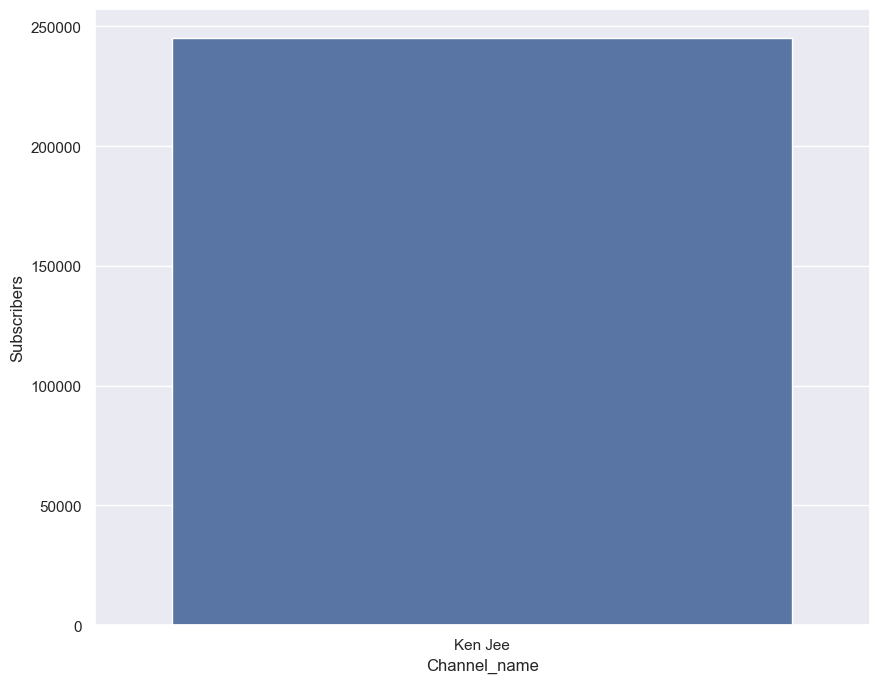

In [13]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='Channel_name',y='Subscribers',data=channel_data)

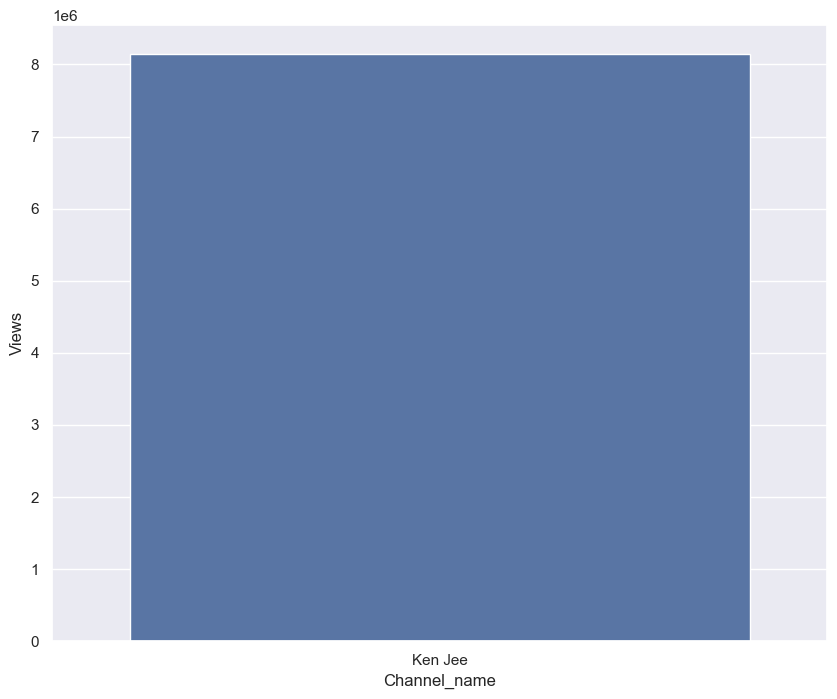

In [14]:
ax = sns.barplot(x='Channel_name',y='Views',data=channel_data)

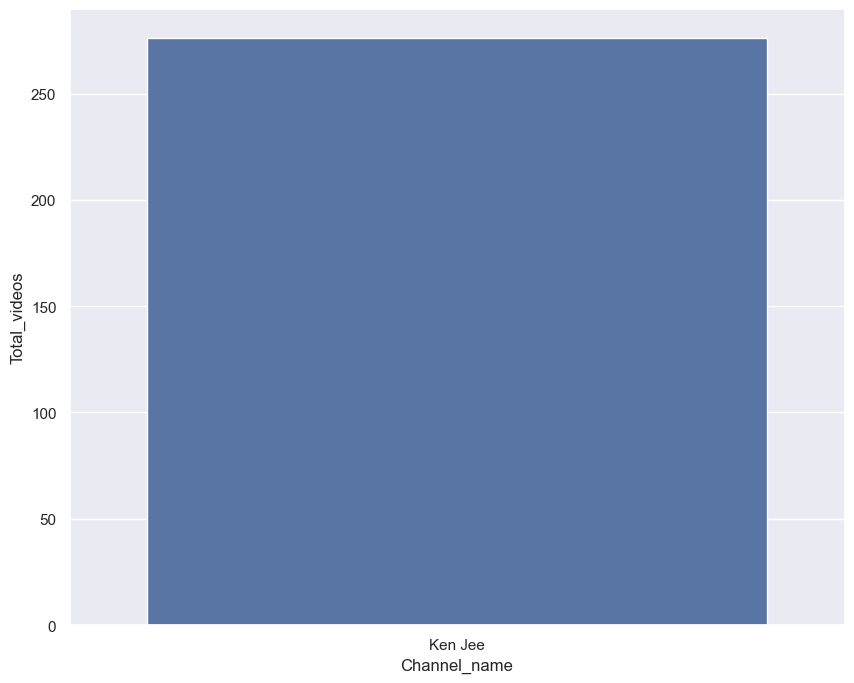

In [15]:
ax = sns.barplot(x='Channel_name',y='Total_videos',data=channel_data)

##  Function to get video ids

In [16]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='Ken Jee', 'playlist_id'].iloc[0]

In [17]:
def get_video_ids(youtube, playlist_id):

    #prepare request from youtube api
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50
                )
    
    #execute request and store as response
    response = request.execute()

    #store video ids in list
    video_ids = []
    for i in range (len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    #check for next page
    print("nextPageToken(first part) = "+response.get('nextPageToken'))
    next_page_token = response.get('nextPageToken')
    more_pages = True
    while more_pages:
        #if no more pages, update more_pages variable to False
        if next_page_token is None:
            more_pages = False
        #if there are more pages, run the request with pageToken and append video_ids
        else:
            #run new request with page Token
            request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50,
                pageToken = next_page_token
                )
            
            #execute new request
            response = request.execute()

            #loop through new video ids
            for i in range (len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            #update next_page_token for next round of while loop
            print("nextPageToken second part= "+str(response.get('nextPageToken')))
            next_page_token = response.get('nextPageToken')
            # print(next_page_token)


    return video_ids

In [18]:
video_ids = get_video_ids(youtube, playlist_id)

nextPageToken(first part) = EAAaBlBUOkNESQ
nextPageToken second part= EAAaBlBUOkNHUQ
nextPageToken second part= EAAaB1BUOkNKWUI
nextPageToken second part= EAAaB1BUOkNNZ0I
nextPageToken second part= EAAaB1BUOkNQb0I
nextPageToken second part= None


In [19]:
video_ids

['HVpbmu7rFYE',
 'NQQ3DRdXAXE',
 'xpi-M2j3NmE',
 'X07w7QFoLpc',
 'RRnThAtKuq0',
 'r3zOpjEOkgE',
 's-XYFEzy9Wc',
 'iBh1wl4o6V4',
 'L6lXKdP4Qbg',
 'xGDl6rlBygU',
 'SY6y6Y8C594',
 '1RUj2aLQx8I',
 'MkzZXSw1Glk',
 '9neDFXTxKxA',
 'UaNNVukM27g',
 '3lN0-S3symM',
 'M-AN8eWLxms',
 'MXFZhbvQqM8',
 '54n61XjKifI',
 'pyWYIRR8rrE',
 'onwRfbt--cw',
 'u6P23ouSYhA',
 'RMMVuvS7S_g',
 '5AwbPAV8FS0',
 'A2OQgU0IRNo',
 'x5Q_nrIqFik',
 '7ja2ELBVMlU',
 'Z2MyLQa_vVw',
 'JTlB9fwYRk0',
 'OJDf_fTENJ4',
 'nqCkdqhV-JY',
 'b8t8lDL13sg',
 't6CD1EwU5kc',
 'eIxHe45hzhQ',
 '3NJOWWvNK3I',
 '4_VtMWJSo1o',
 'OybXWl3IWvI',
 'nRHPQ5ZeB5Y',
 '0JWC4M0Qhqc',
 'oNvyvYGw5n4',
 'GaZRuchRCyw',
 'EBjYqC3aNTA',
 'QMP858aZcow',
 '0ItYIoOrrUs',
 'KzTFoUbThvM',
 'bBJd0oPdNak',
 'Yk-unX4KnV4',
 'z0_xrtFdFj8',
 'vVpkXEIn-q0',
 'aipz4p7GDL4',
 'iPdO9MwdcLE',
 'YPph59-rTxA',
 '-2U2CMYom00',
 'KEeUR8UDy-s',
 '0jTtHYie3CU',
 '2RWwN5ZT4tA',
 'rEWPqw6rMGI',
 'o-wsyxWbPOw',
 'xpIFS6jZbe8',
 '-zbLpoJVBMI',
 'scSc6YSanQ0',
 'FqNpDNmpcEo',
 'vwvdtX

Function to get video details

In [30]:
def get_video_details(youtube, video_ids):

    all_video_stats=[]

    for i in range (0, len(video_ids), 50):
        request = youtube.videos().list(
                    part='snippet,statistics',
                    id=','.join(video_ids[i:i+50]) #note that youtube limitation is max 50 
                    )
        
        response = request.execute()

        for video in response['items']:
            video_stats=dict(Title = video['snippet']['title'],
                             Published_date = video['snippet']['publishedAt'],
                             Views = video['statistics']['viewCount'],
                             Likes = video['statistics']['likeCount'],
                            #  Dislikes = video['statistics']['dislikeCount'], #no more dislikeCount
                             Comments = video['statistics']['commentCount']
                             )
            all_video_stats.append(video_stats)



    return all_video_stats

In [31]:
#execute and store data in variable
video_details = get_video_details(youtube, video_ids)

In [32]:
# use pandas to create dataframe
video_data = pd.DataFrame(video_details)

In [33]:
video_data

,Title,Published_date,Views,Likes,Comments
0,AI: A Customer Service Revolution?,2023-05-26T12:00:21Z,2368,83,24
1,Beginner Kaggle Data Science Project Walk-Thro...,2023-05-16T12:00:25Z,10525,468,49
2,How I Would Learn Data Science with AI (If I C...,2023-05-04T12:04:56Z,20366,898,59
3,This AI question will determine our future,2023-04-06T13:00:32Z,3925,251,37
4,I'll Never Code the Same Again... (GPT-4 is OP),2023-04-03T13:00:27Z,69179,778,77
...,...,...,...,...,...
271,How to Simulate NBA Games in Python,2018-11-19T23:31:49Z,17399,386,54
272,Should You Get A Masters in Data Science?,2018-11-14T01:39:33Z,20453,304,138
273,How I Became A Data Scientist From a Business ...,2018-11-12T00:26:08Z,6374,197,23
274,Predicting Season Long NBA Wins Using Multiple...,2018-07-10T16:39:52Z,8528,193,17


In [38]:
#Check dataframe data type
video_data.dtypes

Title                          object
Published_date    datetime64[ns, UTC]
Views                           int64
Likes                           int64
Comments                       object
dtype: object

In [39]:
#modify datetime
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])


In [40]:
#Check dataframe data type
video_data.dtypes

Title             object
Published_date    object
Views              int64
Likes              int64
Comments          object
dtype: object

In [43]:
#top 10 videos
top10_videos = video_data.sort_values(by='Views', ascending = False).head(10)
top10_videos

,Title,Published_date,Views,Likes,Comments
178,How I Would Learn Data Science (If I Had to St...,2020-05-08,1388447,48977,1997
199,The Best Free Data Science Courses Nobody is T...,2020-03-09,341113,21027,618
58,How I Would Learn Data Science in 2022 (If I H...,2021-12-27,334017,14780,536
205,3 Proven Data Science Projects for Beginners (...,2020-02-17,319833,17569,519
154,Beginner Kaggle Data Science Project Walk-Thro...,2020-07-17,305779,6888,409
191,Data Science Project from Scratch - Part 1 (Pr...,2020-04-03,172243,4565,170
244,The Projects You Should Do To Get A Data Scien...,2019-07-30,148327,5669,253
91,Why You Probably Won't Become a Data Scientist,2021-04-09,136016,3992,482
106,How I Would Learn Data Science in 2021 (What H...,2020-12-19,131109,5973,494
175,How to Make A Data Science Portfolio Website w...,2020-05-15,120268,4187,192


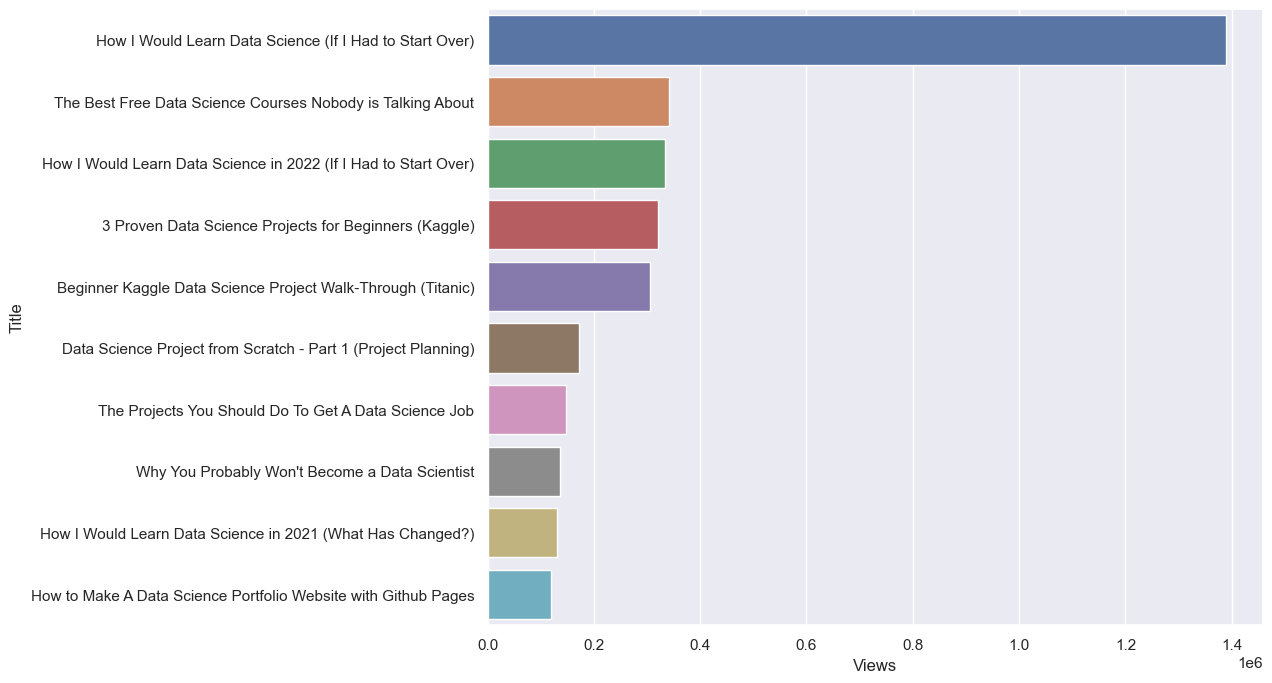

In [44]:
ax1 = sns.barplot(x='Views',y='Title',data=top10_videos)

In [45]:
video_data

,Title,Published_date,Views,Likes,Comments
0,AI: A Customer Service Revolution?,2023-05-26,2368,83,24
1,Beginner Kaggle Data Science Project Walk-Thro...,2023-05-16,10525,468,49
2,How I Would Learn Data Science with AI (If I C...,2023-05-04,20366,898,59
3,This AI question will determine our future,2023-04-06,3925,251,37
4,I'll Never Code the Same Again... (GPT-4 is OP),2023-04-03,69179,778,77
...,...,...,...,...,...
271,How to Simulate NBA Games in Python,2018-11-19,17399,386,54
272,Should You Get A Masters in Data Science?,2018-11-14,20453,304,138
273,How I Became A Data Scientist From a Business ...,2018-11-12,6374,197,23
274,Predicting Season Long NBA Wins Using Multiple...,2018-07-10,8528,193,17


In [46]:
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')

In [47]:
video_data

,Title,Published_date,Views,Likes,Comments,Month
0,AI: A Customer Service Revolution?,2023-05-26,2368,83,24,May
1,Beginner Kaggle Data Science Project Walk-Thro...,2023-05-16,10525,468,49,May
2,How I Would Learn Data Science with AI (If I C...,2023-05-04,20366,898,59,May
3,This AI question will determine our future,2023-04-06,3925,251,37,Apr
4,I'll Never Code the Same Again... (GPT-4 is OP),2023-04-03,69179,778,77,Apr
...,...,...,...,...,...,...
271,How to Simulate NBA Games in Python,2018-11-19,17399,386,54,Nov
272,Should You Get A Masters in Data Science?,2018-11-14,20453,304,138,Nov
273,How I Became A Data Scientist From a Business ...,2018-11-12,6374,197,23,Nov
274,Predicting Season Long NBA Wins Using Multiple...,2018-07-10,8528,193,17,Jul


In [50]:
videos_per_month = video_data.groupby('Month', as_index=False).size()
videos_per_month

,Month,size
0,Apr,22
1,Aug,24
2,Dec,20
3,Feb,25
4,Jan,29
5,Jul,25
6,Jun,19
7,Mar,32
8,May,24
9,Nov,20


In [51]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [52]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories = sort_order, ordered=True)

In [53]:
videos_per_month.sort_index

<bound method DataFrame.sort_index of       Month  size
Month            
Apr     Apr    22
Aug     Aug    24
Dec     Dec    20
Feb     Feb    25
Jan     Jan    29
Jul     Jul    25
Jun     Jun    19
Mar     Mar    32
May     May    24
Nov     Nov    20
Oct     Oct    17
Sep     Sep    19>

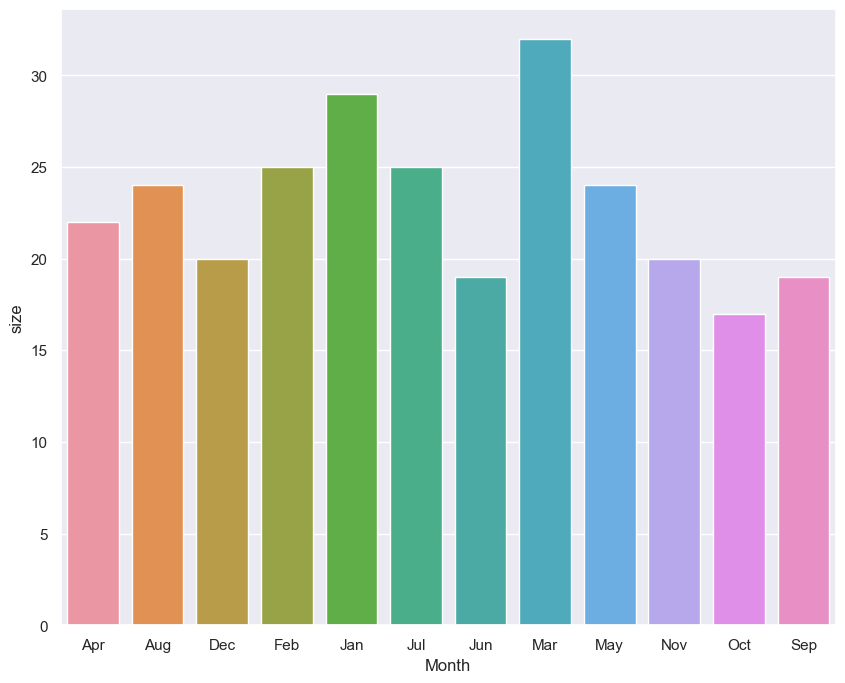

In [54]:
ax2 = sns.barplot(x='Month',y='size',data=videos_per_month)

In [55]:
video_data.to_csv('Video_Details(Ken Jee).csv')

,Title,Published_date,Views,Likes,Comments,Month
0,AI: A Customer Service Revolution?,2023-05-26,2368,83,24,May
1,Beginner Kaggle Data Science Project Walk-Thro...,2023-05-16,10525,468,49,May
2,How I Would Learn Data Science with AI (If I C...,2023-05-04,20366,898,59,May
3,This AI question will determine our future,2023-04-06,3925,251,37,Apr
4,I'll Never Code the Same Again... (GPT-4 is OP),2023-04-03,69179,778,77,Apr
...,...,...,...,...,...,...
271,How to Simulate NBA Games in Python,2018-11-19,17399,386,54,Nov
272,Should You Get A Masters in Data Science?,2018-11-14,20453,304,138,Nov
273,How I Became A Data Scientist From a Business ...,2018-11-12,6374,197,23,Nov
274,Predicting Season Long NBA Wins Using Multiple...,2018-07-10,8528,193,17,Jul
